<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/CMPE255_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 Assignment 2
### Shawn Chumbar

### Setup
This section needs to run before any of the other models run.

In [134]:
!pip install pycaret

In [135]:
!pip install pandas

In [136]:
!pip install umap-learn

In [137]:
!pip install gradio

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd
import gradio as gr

### Regression

In [140]:
file_name = 'winequality-red'
url = f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{file_name}.csv'
data = pd.read_csv(url, sep=";")

In [141]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [142]:
target_name = 'quality'

In [143]:
from pycaret.regression import *
s = setup(data, target=target_name,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

In [144]:
best = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [145]:
print(best)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='squared_error',
                    max_depth=None, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=5559, verbose=0,
                    warm_start=False)


In [146]:
finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'alcohol'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_em...
                ('actual_estimator',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='squared_error', max_depth=None,
                                     max_features=1.0, max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=5559,
                                     verbose=0, warm_start=False))],
         verbose=False)

In [147]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Binary Classification

In [148]:
file_name = 'diabetes'
url = f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{file_name}.csv'
data = pd.read_csv(url)

In [149]:
target_name = 'Outcome'

In [150]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       85             66             29        0  26.6   
1              1       89             66             23       94  28.1   
2              5      116             74              0        0  25.6   
3             10      115              0              0        0  35.3   
4              4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
763            1      128             88             39      110  36.5   
764            0      123             72              0        0  36.3   
765            6      190             92              0        0  35.5   
766            9      170             74             31        0  44.0   
767            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age       Outcome  
0                       0.351   31  non-diabetic  
1                       0.167   21  non-diabetic  
2                       0.201   30  non-diabetic  
3                       0.134   29  non-diabetic  
4                       0.191   30  non-diabetic  
..                        ...  ...           ...  
763                     1.057   37      diabetic  
764                     0.258   52      diabetic  
765                     0.278   66      diabetic  
766                     0.403   43      diabetic  
767                     0.349   47      diabetic  

[768 rows x 9 columns]

In [151]:
from pycaret.classification import *
s = setup(data, target=target_name,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [152]:
best_model = compare_models()
lda = create_model('lda')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [153]:
mt = tune_model(lda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [154]:
em = ensemble_model(mt)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [155]:
new_data = pd.read_csv('/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/synthetic_test_data.csv')

In [156]:
predict = predict_model(mt, data=new_data)

In [157]:
predict

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0     8.781382  129.018173      58.141811      20.895844  125.532631   
1     5.947526   74.006210      58.772377      39.213154  193.040070   
2     8.527205  131.319489      84.940628      25.181581  -27.319164   
3     2.461404  130.667526      85.165115      55.845139  -70.774513   
4     7.958813  177.718414      54.789829      18.719604   71.907639   
5     0.818007  117.629921      59.625443      10.397817   90.924110   
6     5.532162  114.120461      59.845875      47.243137  251.030365   
7    -0.487698   83.555420      74.404602      25.767284  165.245956   
8     1.722798   36.538876      91.842262       1.418509  -13.777281   
9     0.294152  140.695236      34.973385      42.587334  -29.775612   

         BMI  DiabetesPedigreeFunction        Age  Outcome prediction_label  \
0  46.982399                  0.991044  39.317654        1         diabetic   
1  27.585478                  1.148013  39.902340        1     non-diabetic   
2  26.133499                  0.692527  40.630428        0     non-diabetic   
3  32.688835                  0.603323  34.358501        1     non-diabetic   
4  48.899338                  0.232340  26.586416        0         diabetic   
5  35.655212                  0.867805  42.744717        1     non-diabetic   
6  31.844193                  0.388660  21.763626        1     non-diabetic   
7  19.040340                  0.361946  53.051655        1     non-diabetic   
8  36.194443                  0.211281  20.578224        1     non-diabetic   
9  40.441616                  0.331400  27.930307        0         diabetic   

   prediction_score  
0            0.8542  
1            0.8928  
2            0.5634  
3            0.5562  
4            0.9487  
5            0.6210  
6            0.7994  
7            0.9782  
8            0.9926  
9            0.6936

In [158]:
evaluate_model(mt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [159]:
finalize_model(best_model)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pregnancies', 'Glucose',
                                             'BloodPressure', 'SkinThickness',
                                             'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction',
                                             'Age'],
                                    transformer=SimpleImput...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=710,
                                 solver='auto', tol=0.0001))],
         verbose=False)

In [160]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

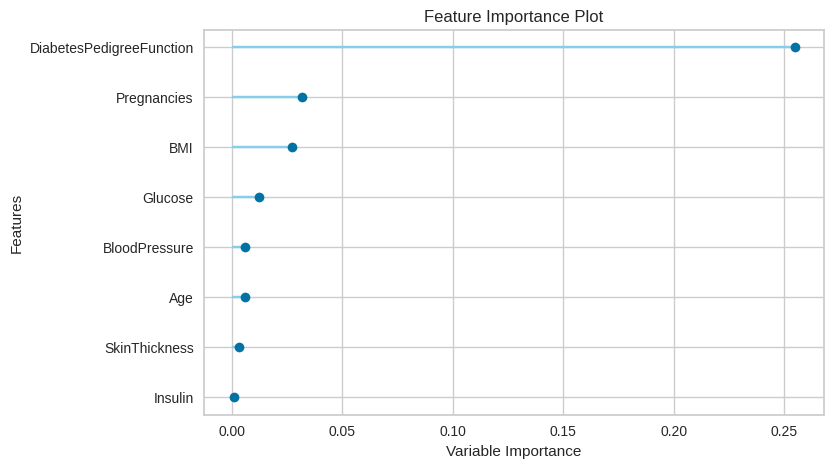

In [161]:
plot_model(best_model, plot='feature')

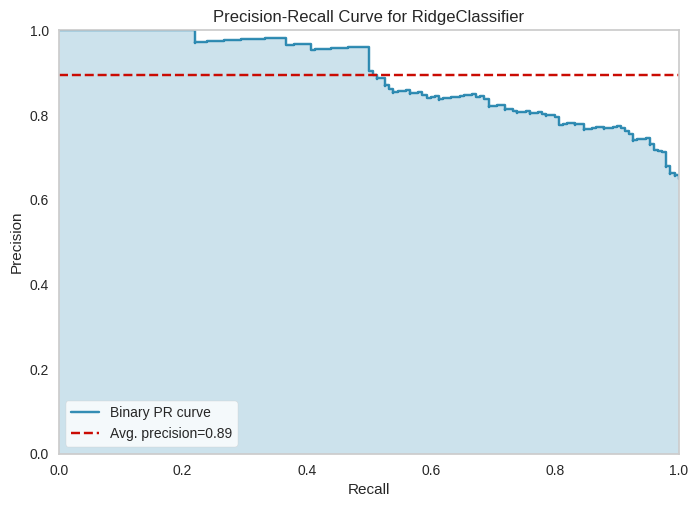

In [162]:
plot_model(best_model, plot = 'pr')

### Multiclass Classification

In [163]:
file_name = 'seeds_dataset'
df = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{file_name}.csv')

In [164]:
target_name = 'Target'

In [165]:
df

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0     0.117164   0.186797   0.008144   0.270860   0.123135  -1.007371   
1    -0.013302  -0.019760   0.442341  -0.201481   0.178783  -1.827187   
2    -0.215868  -0.386972   1.469798  -0.795861   0.189383  -0.681625   
3    -0.370368  -0.501725   1.061395  -0.721281   0.300679  -0.981475   
4     0.419297   0.301550   1.401014   0.033559   0.785615  -1.597530   
..         ...        ...        ...        ...        ...        ...   
194  -0.936866  -1.067843   0.321970  -1.143902  -0.753989  -0.046488   
195  -1.266465  -1.312651  -0.847353  -1.137122  -1.246874   0.426457   
196  -0.590100  -0.715932   0.751868  -0.920162  -0.088859   3.145549   
197  -1.057032  -1.060193  -0.804363  -1.058022  -1.138227  -0.068977   
198  -0.899099  -0.960740  -0.103629  -0.904341  -0.772538   1.320554   

     Feature_7  Target  
0    -0.408265       0  
1    -0.945420       0  
2    -1.211962       0  
3    -1.252656       0  
4    -0.499825       0  
..         ...     ...  
194  -1.120402       2  
195  -0.849790       2  
196  -0.741952       2  
197  -0.766368       2  
198  -0.727709       2  

[199 rows x 8 columns]

In [166]:
df.dtypes

Feature_1    float64
Feature_2    float64
Feature_3    float64
Feature_4    float64
Feature_5    float64
Feature_6    float64
Feature_7    float64
Target         int64
dtype: object

In [167]:
from pycaret.classification import *
s = setup(df, target='Target')

In [168]:
best = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [169]:
model = create_model('et', cross_validation=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [170]:
tm = tune_model(model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [171]:
em = ensemble_model(tm)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [172]:
evaluate_model(em)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

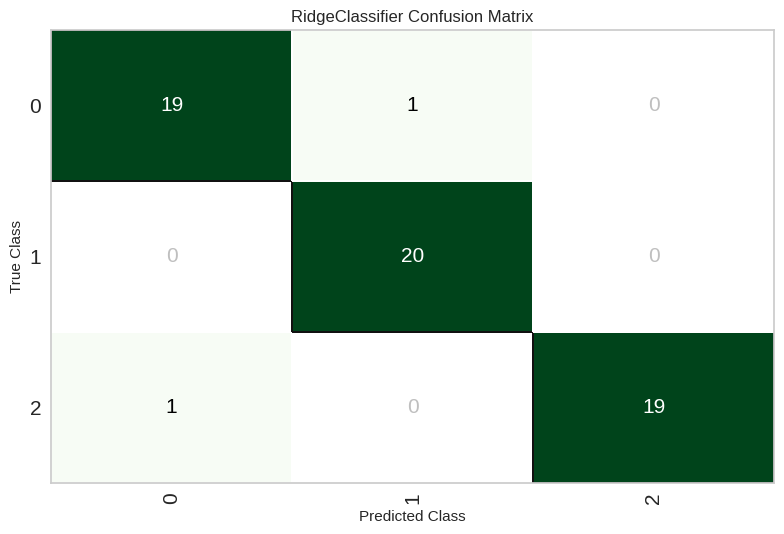

In [173]:
plot_model(best, plot = 'confusion_matrix')

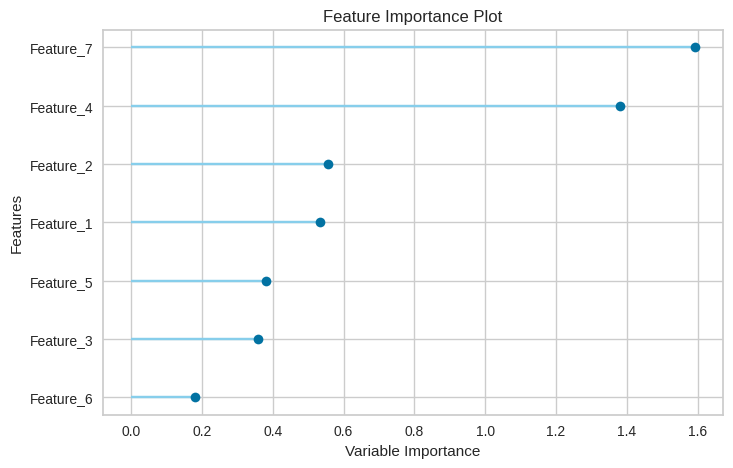

In [174]:
plot_model(best, plot = 'feature')

In [175]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [179]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Feature_1', 'Feature_2',
                                              'Feature_3', 'Feature_4',
                                              'Feature_5', 'Feature_6',
                                              'Feature_7'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='depre...
           

### Clustering

In [231]:
cluster_file_name = 'KC_House_Data'
df_cluster = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{cluster_file_name}.csv')

In [232]:
df_cluster.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [233]:
df_cluster

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0     -0.866717 -0.398737  -1.447464    -0.979835 -0.228321 -0.915427   
1     -0.005688 -0.398737   0.175607     0.533634 -0.189885  0.936506   
2     -0.980849 -1.473959  -1.447464    -1.426254 -0.123298 -0.915427   
3      0.174090  0.676485   1.149449    -0.130550 -0.244014 -0.915427   
4     -0.081958 -0.398737  -0.149007    -0.435422 -0.169653 -0.915427   
...         ...       ...        ...          ...       ...       ...   
21608 -0.490545 -0.398737   0.500221    -0.598746 -0.337424  2.788439   
21609 -0.381588  0.676485   0.500221     0.250539 -0.224386  0.936506   
21610 -0.375865 -1.473959  -1.772078    -1.154047 -0.332137  0.936506   
21611 -0.381588 -0.398737   0.500221    -0.522528 -0.307076  0.936506   
21612 -0.585882 -1.473959  -1.772078    -1.154047 -0.338752  0.936506   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
0       -0.087173 -0.305759  -0.629187 -0.558836   -0.734708      -0.658681   
1       -0.087173 -0.305759  -0.629187 -0.558836    0.460841       0.245141   
2       -0.087173 -0.305759  -0.629187 -1.409587   -1.229834      -0.658681   
3       -0.087173 -0.305759   2.444294 -0.558836   -0.891699       1.397515   
4       -0.087173 -0.305759  -0.629187  0.291916   -0.130895      -0.658681   
...           ...       ...        ...       ...         ...            ...   
21608   -0.087173 -0.305759  -0.629187  0.291916   -0.312039      -0.658681   
21609   -0.087173 -0.305759  -0.629187  0.291916    0.629908      -0.658681   
21610   -0.087173 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681   
21611   -0.087173 -0.305759  -0.629187  0.291916   -0.227505      -0.658681   
21612   -0.087173 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
0     -0.544898     -0.210128  1.870152 -0.352572 -0.306079      -0.943355   
1     -0.681079      4.746678  0.879568  1.161568 -0.746341      -0.432686   
2     -1.293892     -0.210128 -0.933388  1.283537 -0.135655       1.070140   
3     -0.204446     -0.210128  1.085160 -0.283288 -1.271816      -0.914174   
4      0.544548     -0.210128 -0.073636  0.409550  1.199335      -0.272190   
...         ...           ...       ...       ...       ...            ...   
21608  1.293542     -0.210128  0.468382  1.004958 -0.938069      -0.666135   
21609  1.463768     -0.210128  1.272063 -0.356180 -1.051685      -0.228419   
21610  1.293542     -0.210128  1.234683  0.247888 -0.604321      -1.410253   
21611  1.123316     -0.210128 -0.952078 -0.184414  1.028910      -0.841221   
21612  1.259497     -0.210128  1.234683  0.245723 -0.604321      -1.410253   

       sqft_lot15  
0       -0.260715  
1       -0.187868  
2       -0.172375  
3       -0.284522  
4       -0.192849  
...           ...  
21608   -0.412381  
21609   -0.203946  
21610   -0.394141  
21611   -0.420511  
21612   -0.417948  

[21613 rows x 19 columns]

In [234]:
target_name = 'price'

In [235]:
from pycaret.clustering import *
s = setup(df_cluster)

In [236]:
kmeans = create_model('kmeans')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [237]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0     -0.866717 -0.398737  -1.447464    -0.979835 -0.228321 -0.915427   
1     -0.005688 -0.398737   0.175607     0.533634 -0.189885  0.936506   
2     -0.980849 -1.473959  -1.447464    -1.426254 -0.123298 -0.915427   
3      0.174090  0.676485   1.149449    -0.130550 -0.244014 -0.915427   
4     -0.081958 -0.398737  -0.149007    -0.435422 -0.169653 -0.915427   
...         ...       ...        ...          ...       ...       ...   
21608 -0.490545 -0.398737   0.500221    -0.598746 -0.337424  2.788439   
21609 -0.381588  0.676485   0.500221     0.250539 -0.224386  0.936506   
21610 -0.375865 -1.473959  -1.772078    -1.154047 -0.332137  0.936506   
21611 -0.381588 -0.398737   0.500221    -0.522528 -0.307076  0.936506   
21612 -0.585882 -1.473959  -1.772078    -1.154047 -0.338752  0.936506   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
0       -0.087173 -0.305759  -0.629187 -0.558836   -0.734708      -0.658681   
1       -0.087173 -0.305759  -0.629187 -0.558836    0.460841       0.245141   
2       -0.087173 -0.305759  -0.629187 -1.409587   -1.229834      -0.658681   
3       -0.087173 -0.305759   2.444294 -0.558836   -0.891699       1.397515   
4       -0.087173 -0.305759  -0.629187  0.291916   -0.130895      -0.658681   
...           ...       ...        ...       ...         ...            ...   
21608   -0.087173 -0.305759  -0.629187  0.291916   -0.312039      -0.658681   
21609   -0.087173 -0.305759  -0.629187  0.291916    0.629908      -0.658681   
21610   -0.087173 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681   
21611   -0.087173 -0.305759  -0.629187  0.291916   -0.227505      -0.658681   
21612   -0.087173 -0.305759  -0.629187 -0.558836   -0.927928      -0.658681   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
0     -0.544898     -0.210128  1.870152 -0.352572 -0.306079      -0.943355   
1     -0.681078      4.746677  0.879568  1.161568 -0.746341      -0.432686   
2     -1.293892     -0.210128 -0.933388  1.283537 -0.135655       1.070140   
3     -0.204446     -0.210128  1.085160 -0.283288 -1.271816      -0.914174   
4      0.544548     -0.210128 -0.073636  0.409550  1.199335      -0.272190   
...         ...           ...       ...       ...       ...            ...   
21608  1.293542     -0.210128  0.468382  1.004958 -0.938069      -0.666135   
21609  1.463768     -0.210128  1.272063 -0.356180 -1.051685      -0.228419   
21610  1.293542     -0.210128  1.234683  0.247888 -0.604321      -1.410253   
21611  1.123316     -0.210128 -0.952078 -0.184414  1.028911      -0.841221   
21612  1.259497     -0.210128  1.234683  0.245723 -0.604321      -1.410253   

       sqft_lot15    Cluster  
0       -0.260715  Cluster 0  
1       -0.187868  Cluster 0  
2       -0.172375  Cluster 0  
3       -0.284522  Cluster 0  
4       -0.192849  Cluster 1  
...           ...        ...  
21608   -0.412381  Cluster 1  
21609   -0.203946  Cluster 1  
21610   -0.394141  Cluster 0  
21611   -0.420511  Cluster 1  
21612   -0.417948  Cluster 0  

[21613 rows x 20 columns]

In [238]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

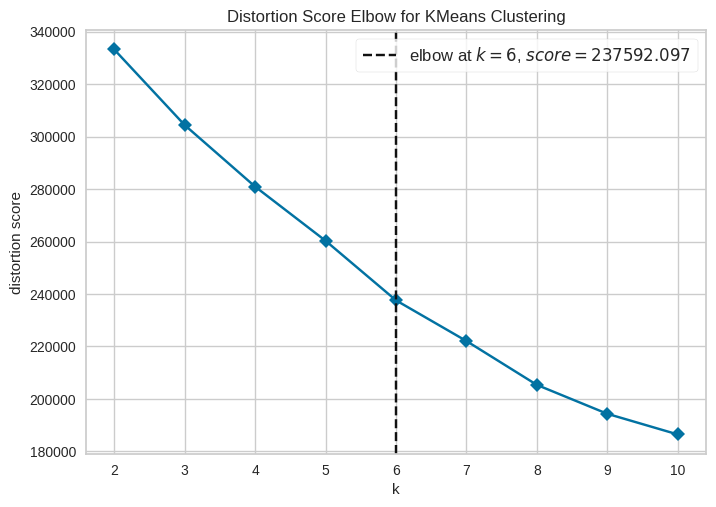

In [239]:
plot_model(kmeans, plot = 'elbow')

In [240]:
plot_model(kmeans, plot = 'distribution')

### Anamoly Detection

In [241]:
cluster_file_name = 'network_traffic_data'
df_ad = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{cluster_file_name}.csv')

In [242]:
df_ad.dtypes

Duration           int64
Protocol_type     object
Service           object
Flag              object
Src_bytes          int64
Dst_bytes          int64
Is_anomaly       float64
dtype: object

In [243]:
df_ad

Duration Protocol_type Service Flag  Src_bytes  Dst_bytes  Is_anomaly
0          10           TCP     DNS   SF        300        804         0.0
1           9           UDP    HTTP   SF        294       1155         0.0
2          11           TCP    HTTP   SF        558       1056         0.0
3          13           UDP     DNS   SF        526       1033         0.0
4           9           TCP     DNS   SF        543        948         0.0
..        ...           ...     ...  ...        ...        ...         ...
995         9           UDP     DNS   S0        400       1264         0.0
996        13           TCP     DNS   SF        393        928         0.0
997        11           UDP    HTTP   SF        420       1089         0.0
998         8           TCP     FTP   SF        512        849         0.0
999        11           TCP     DNS   SF        477       1038         0.0

[1000 rows x 7 columns]

In [244]:
target_name = 'Is_anomaly'

In [245]:
from pycaret.anomaly import *
s = setup(df_ad, session_id = 123)

In [246]:
iforset = create_model('iforest')
iforset

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [247]:
if_anom = assign_model(iforset)
if_anom

Duration Protocol_type Service Flag  Src_bytes  Dst_bytes  Is_anomaly  \
0          10           TCP     DNS   SF        300        804         0.0   
1           9           UDP    HTTP   SF        294       1155         0.0   
2          11           TCP    HTTP   SF        558       1056         0.0   
3          13           UDP     DNS   SF        526       1033         0.0   
4           9           TCP     DNS   SF        543        948         0.0   
..        ...           ...     ...  ...        ...        ...         ...   
995         9           UDP     DNS   S0        400       1264         0.0   
996        13           TCP     DNS   SF        393        928         0.0   
997        11           UDP    HTTP   SF        420       1089         0.0   
998         8           TCP     FTP   SF        512        849         0.0   
999        11           TCP     DNS   SF        477       1038         0.0   

     Anomaly  Anomaly_Score  
0          0      -0.176762  
1          0      -0.186687  
2          0      -0.238743  
3          0      -0.209938  
4          0      -0.235885  
..       ...            ...  
995        0      -0.014605  
996        0      -0.182222  
997        0      -0.239296  
998        0      -0.226112  
999        0      -0.238272  

[1000 rows x 9 columns]

In [248]:
evaluate_model(iforset)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [249]:
prediction_anamoly = predict_model(iforset, data=df_ad)
prediction_anamoly

Duration  Protocol_type  Service_DNS  Service_HTTP  Service_FTP  Flag_SF  \
0        10.0            0.0          1.0           0.0          0.0      1.0   
1         9.0            1.0          0.0           1.0          0.0      1.0   
2        11.0            0.0          0.0           1.0          0.0      1.0   
3        13.0            1.0          1.0           0.0          0.0      1.0   
4         9.0            0.0          1.0           0.0          0.0      1.0   
..        ...            ...          ...           ...          ...      ...   
995       9.0            1.0          1.0           0.0          0.0      0.0   
996      13.0            0.0          1.0           0.0          0.0      1.0   
997      11.0            1.0          0.0           1.0          0.0      1.0   
998       8.0            0.0          0.0           0.0          1.0      1.0   
999      11.0            0.0          1.0           0.0          0.0      1.0   

     Flag_REJ  Flag_S0  Src_bytes  Dst_bytes  Is_anomaly  Anomaly  \
0         0.0      0.0      300.0      804.0         0.0        0   
1         0.0      0.0      294.0     1155.0         0.0        0   
2         0.0      0.0      558.0     1056.0         0.0        0   
3         0.0      0.0      526.0     1033.0         0.0        0   
4         0.0      0.0      543.0      948.0         0.0        0   
..        ...      ...        ...        ...         ...      ...   
995       0.0      1.0      400.0     1264.0         0.0        0   
996       0.0      0.0      393.0      928.0         0.0        0   
997       0.0      0.0      420.0     1089.0         0.0        0   
998       0.0      0.0      512.0      849.0         0.0        0   
999       0.0      0.0      477.0     1038.0         0.0        0   

     Anomaly_Score  
0        -0.176762  
1        -0.186687  
2        -0.238743  
3        -0.209938  
4        -0.235885  
..             ...  
995      -0.014605  
996      -0.182222  
997      -0.239296  
998      -0.226112  
999      -0.238272  

[1000 rows x 13 columns]

In [250]:
plot_model(iforset, plot = 'tsne')

### Association Rules Mining

**PLEASE READ: This section is incomplete as I could not get pyCaret to work for association rules mining.**

## Time Series Forecasting

### Time Series Forecasting - Univariate without Exogenous Variables


In [251]:
ts_forecasting_file_name = 'tsf_training'
df_tsf = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{ts_forecasting_file_name}.csv')

In [252]:
df_tsf.dtypes

Date      object
Sales    float64
dtype: object

In [253]:
tsf_target_name = 'Sales'

<Axes: >

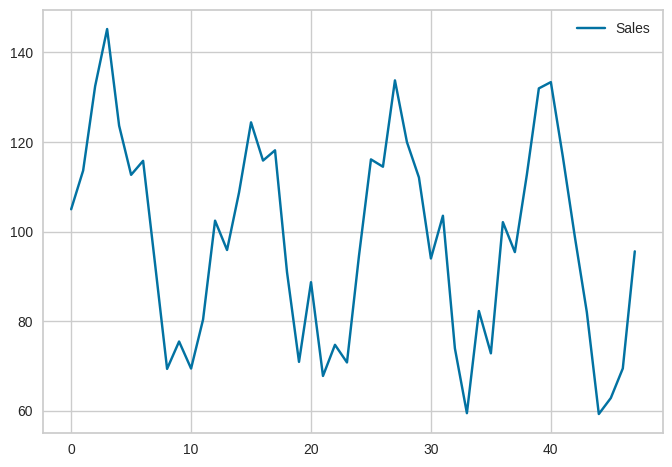

In [254]:
# plot the dataset
df_tsf.plot()

In [255]:
df_tsf['Date'] = pd.to_datetime(df_tsf['Date'])
df_tsf.set_index('Date', inplace=True)

In [256]:
!pip install pycaret

In [257]:
from pycaret.time_series import *
s = setup(df_tsf, target = tsf_target_name)

In [258]:
check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed              p-value   
11   White Noise   Ljung-Box  Transformed          White Noise   
12  Stationarity         ADF  Transformed         Stationarity   
13  Stationarity         ADF  Transformed              p-value   
14  Stationarity         ADF  Transformed       Test Statistic   
15  Stationarity         ADF  Transformed    Critical Value 1%   
16  Stationarity         ADF  Transformed    Critical Value 5%   
17  Stationarity         ADF  Transformed   Critical Value 10%   
18  Stationarity        KPSS  Transformed   Trend Stationarity   
19  Stationarity        KPSS  Transformed              p-value   
20  Stationarity        KPSS  Transformed       Test Statistic   
21  Stationarity        KPSS  Transformed   Critical Value 10%   
22  Stationarity        KPSS  Transformed    Critical Value 5%   
23  Stationarity        KPSS  Transformed  Critical Value 2.5%   
24  Stationarity        KPSS  Transformed    Critical Value 1%   
25     Normality     Shapiro  Transformed            Normality   
26     Normality     Shapiro  Transformed              p-value   

                     Setting       Value  
0                                   48.0  
1                                    0.0  
2                              97.946458  
3                                 97.355  
4                              22.790542  
5                             519.408806  
6                              -1.011722  
7                               0.018151  
8                                   48.0  
9   {'alpha': 0.05, 'K': 24}  284.081748  
10  {'alpha': 0.05, 'K': 24}         0.0  
11  {'alpha': 0.05, 'K': 24}       False  
12           {'alpha': 0.05}        True  
13           {'alpha': 0.05}    0.000034  
14           {'alpha': 0.05}   -4.908791  
15           {'alpha': 0.05}   -3.605565  
16           {'alpha': 0.05}   -2.937069  
17           {'alpha': 0.05}   -2.606986  
18           {'alpha': 0.05}        True  
19           {'alpha': 0.05}         0.1  
20           {'alpha': 0.05}    0.047161  
21           {'alpha': 0.05}       0.119  
22           {'alpha': 0.05}       0.146  
23           {'alpha': 0.05}       0.176  
24           {'alpha': 0.05}       0.216  
25           {'alpha': 0.05}        True  
26           {'alpha': 0.05}    0.115057

In [259]:
best = compare_models()

Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [260]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [261]:
holdout_pred = predict_model(best)

In [262]:
holdout_pred.head()

y_pred
2022-12  84.4841

In [263]:
predict_model(best, fh = 10)

y_pred
2022-12   84.4841
2023-01  106.9831
2023-02  104.3941
2023-03  124.6331
2023-04  109.8941
2023-05  102.9531
2023-06   83.9041
2023-07   94.3931
2023-08   63.8041
2023-09   50.2931

### Time Series Forecasting - Univariate with Exogenous Variables


In [278]:
ts_uni_file_name = 'ice_cream_sales'
df_uni = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{ts_uni_file_name}.csv')

In [279]:
df_uni.dtypes

Date                 object
Sales               float64
AdvertisingSpend      int64
Temperature         float64
dtype: object

In [280]:
tsuni_target_name = 'Sales'

<Axes: >

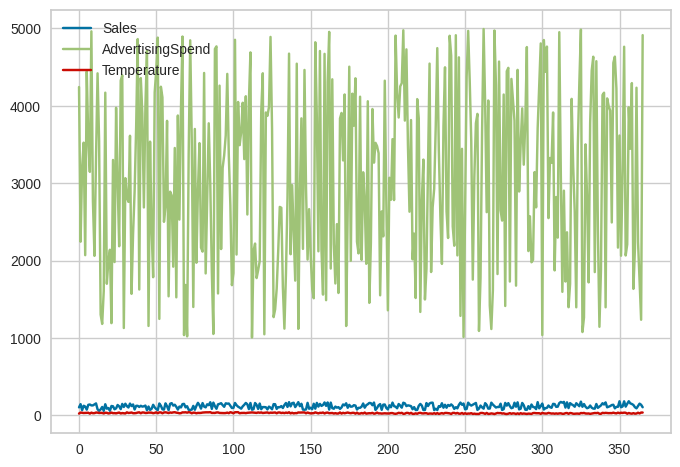

In [281]:
df_uni.plot()

In [282]:
df_uni['Date'] = pd.to_datetime(df_uni['Date'])
df_uni.set_index('Date', inplace=True)

In [283]:
from pycaret.time_series import *
s = setup(df_uni, target = tsuni_target_name, fold=2, fh=12,)

In [284]:
check_stats()

Test   Test Name         Data             Property  \
0        Summary  Statistics  Transformed               Length   
1        Summary  Statistics  Transformed     # Missing Values   
2        Summary  Statistics  Transformed                 Mean   
3        Summary  Statistics  Transformed               Median   
4        Summary  Statistics  Transformed   Standard Deviation   
5        Summary  Statistics  Transformed             Variance   
6        Summary  Statistics  Transformed             Kurtosis   
7        Summary  Statistics  Transformed             Skewness   
8        Summary  Statistics  Transformed    # Distinct Values   
9    White Noise   Ljung-Box  Transformed       Test Statictic   
10   White Noise   Ljung-Box  Transformed       Test Statictic   
11   White Noise   Ljung-Box  Transformed              p-value   
12   White Noise   Ljung-Box  Transformed              p-value   
13   White Noise   Ljung-Box  Transformed          White Noise   
14   White Noise   Ljung-Box  Transformed          White Noise   
15  Stationarity         ADF  Transformed         Stationarity   
16  Stationarity         ADF  Transformed              p-value   
17  Stationarity         ADF  Transformed       Test Statistic   
18  Stationarity         ADF  Transformed    Critical Value 1%   
19  Stationarity         ADF  Transformed    Critical Value 5%   
20  Stationarity         ADF  Transformed   Critical Value 10%   
21  Stationarity        KPSS  Transformed   Trend Stationarity   
22  Stationarity        KPSS  Transformed              p-value   
23  Stationarity        KPSS  Transformed       Test Statistic   
24  Stationarity        KPSS  Transformed   Critical Value 10%   
25  Stationarity        KPSS  Transformed    Critical Value 5%   
26  Stationarity        KPSS  Transformed  Critical Value 2.5%   
27  Stationarity        KPSS  Transformed    Critical Value 1%   
28     Normality     Shapiro  Transformed            Normality   
29     Normality     Shapiro  Transformed              p-value   

                     Setting       Value  
0                                  366.0  
1                                    0.0  
2                             116.937902  
3                             116.706178  
4                              30.102111  
5                              906.13706  
6                              -1.008543  
7                              -0.004794  
8                                  366.0  
9   {'alpha': 0.05, 'K': 24}   16.286861  
10  {'alpha': 0.05, 'K': 48}   48.853948  
11  {'alpha': 0.05, 'K': 24}    0.877445  
12  {'alpha': 0.05, 'K': 48}    0.438548  
13  {'alpha': 0.05, 'K': 24}        True  
14  {'alpha': 0.05, 'K': 48}        True  
15           {'alpha': 0.05}        True  
16           {'alpha': 0.05}         0.0  
17           {'alpha': 0.05}  -18.248218  
18           {'alpha': 0.05}   -3.448394  
19           {'alpha': 0.05}   -2.869491  
20           {'alpha': 0.05}   -2.571006  
21           {'alpha': 0.05}        True  
22           {'alpha': 0.05}         0.1  
23           {'alpha': 0.05}    0.058913  
24           {'alpha': 0.05}       0.119  
25           {'alpha': 0.05}       0.146  
26           {'alpha': 0.05}       0.176  
27           {'alpha': 0.05}       0.216  
28           {'alpha': 0.05}       False  
29           {'alpha': 0.05}    0.000002

In [285]:
best_uni = compare_models()

Processing:   0%|          | 0/93 [00:00<?, ?it/s]

In [286]:
aarima_model = create_model('auto_arima')
aarima_model_finalized = finalize_model(aarima_model)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [287]:
evaluate_model(aarima_model_finalized)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [288]:
holdout_pred = predict_model(best_uni)

In [289]:
predict_model(best_uni, fh = 20)

y_pred
2020-12-20  112.9888
2020-12-21  113.9440
2020-12-22  125.4952
2020-12-23  100.8522
2020-12-24  122.4517
2020-12-25  107.0634
2020-12-26  107.1483
2020-12-27  106.2922
2020-12-28  111.8791
2020-12-29  111.6325
2020-12-30  144.3295
2020-12-31  126.0942
2021-01-01  126.8496
2021-01-02  127.4824
2021-01-03  128.2116
2021-01-04  127.3754
2021-01-05  128.2822
2021-01-06  127.4460
2021-01-07  128.3528
2021-01-08  127.5166

## Gradio Examples

### Gradio Example 1: Classification

In [290]:
gradio_file_name_1 = 'bmi'
df_bmi = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{gradio_file_name_1}.csv')

In [291]:
df_bmi.dtypes

Age           int64
Height      float64
Weight      float64
Bmi         float64
BmiClass     object
dtype: object

In [292]:
from pycaret.classification import *
bmiClassification= setup(df_bmi, target = 'BmiClass')

In [293]:
best_bmi_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [294]:
dt_model = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [295]:
tuned_dt = tune_model(dt_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [296]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [297]:
def predict_bmi_class(age, height, weight):
    # Compute BMI
    bmi = weight / (height ** 2)

    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'Bmi': [bmi]
    })

    # Make prediction
    prediction = predict_model(dt_model, data=input_data)['prediction_label'][0]

    return prediction

In [298]:
import gradio as gr
bmi_demo = gr.Interface(
    fn=predict_bmi_class,
    inputs=[
        "number", "number", "number"
        # gr.inputs.Number(label="Age"),
        # gr.inputs.Number(label="Height"),
        # gr.inputs.Number(label="Weight"),
    ],
    outputs=gr.outputs.Textbox(label="Predicted BmiClass")
)

In [299]:
predict_bmi_class(1, 1, 300)

'Obese Class 3'

In [300]:
bmi_demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://66f092bafa9e78b0fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [301]:
bmi_demo.close()

Closing server running on port: 7860


### Gradio Example 2: Regression

In [302]:
gradio_file_name_2 = 'abalone'
df_gradio_2 = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{gradio_file_name_2}.csv')

In [303]:
df_gradio_2.dtypes


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [304]:
df_gradio_2


Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [305]:
from pycaret.regression import *
s = setup(df_gradio_2, target='Rings')

In [306]:
best = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [307]:
gbr_mod = create_model('gbr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [308]:
gradio_2_test_dataset = 'abalone_test'
df_gradio_2_test = pd.read_csv(f'/content/drive/MyDrive/SJSU/CMPE_255/assignment_02/Datasets/{gradio_file_name_2}.csv')

In [309]:
prediction_gbr = predict_model(gbr_mod, data=df_gradio_2_test)

In [310]:
def predict_age(Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight):
    input_data = pd.DataFrame({
        'Sex': [Sex],
        'Length': [Length],
        'Diameter': [Diameter],
        'Height': [Height],
        'Whole weight': [Whole_weight],
        'Shucked weight': [Shucked_weight],
        'Viscera weight': [Viscera_weight],
        'Shell weight': [Shell_weight]
    })

    # Use the trained model to predict the age
    predicted_age = predict_model(gbr_mod, data=input_data)['prediction_label'][0]#.values[0]
    print(predicted_age)

    return int(round(predicted_age))  # Return the predicted age rounded to the nearest integer

In [311]:
test_prediction = predict_age('M', 0.455, 0.365, 0.095, 0.5140, 0.2245, 0.1010, 0.150)

10.389751626858834


In [312]:
test_prediction_2 = predict_age('F', 0.58, 0.45, 0.17, 0.9705, 0.4615, 0.232, 0.248)

9.57850340849661


In [313]:
import gradio as gr

ring_demo = gr.Interface(
    fn=predict_age,
    inputs=[
        gr.inputs.Radio(['M', 'F', 'I'], label="Sex"),
        gr.inputs.Slider(minimum=0, maximum=1, step=0.01, label="Length"),
        gr.inputs.Slider(minimum=0, maximum=1, step=0.01, label="Diameter"),
        gr.inputs.Slider(minimum=0, maximum=1, step=0.01, label="Height"),
        gr.inputs.Slider(minimum=0, maximum=3, step=0.01, label="Whole Weight"),
        gr.inputs.Slider(minimum=0, maximum=2, step=0.01, label="Shucked Weight"),
        gr.inputs.Slider(minimum=0, maximum=1, step=0.01, label="Viscera Weight"),
        gr.inputs.Slider(minimum=0, maximum=2, step=0.01, label="Shell Weight"),
    ],
    outputs=gr.outputs.Textbox(label="Rings")
    #outputs=gr.outputs.Number(label="Rings")
)

# Launch the interface
ring_demo.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [314]:
ring_demo.close()

Closing server running on port: 7860
